# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

In [1]:
import pandas as pd
# import psycopg2 as pg
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# conn = pg.connect(dbname='module_6', user='postgres', password='postgres', host='localhost')
# cursor = conn.cursor()

# cursor.execute("SELECT table_name FROM information_schema.tables WHERE table_schema='public' AND table_type!='BASE_TABLE'")
# tables = cursor.fetchall()
# tables = [t[0] for t in tables]
# tables

In [3]:
# query = '''
#     SELECT * FROM {};
# '''
# for i in range(len(tables)):
#     pd.read_sql(query.format(tables[i]), conn).to_csv(f'data/{tables[i]}.csv')
    

In [4]:
# Загрузка уже выгруженных таблиц из csv
tables = ['d_work', 'd_clients', 'd_agreement', 'd_last_credit', 
          'd_job', 'd_loan', 'd_close_loan', 'd_salary', 'd_pens']

df = {}
for i in range(len(tables)):
    df[tables[i]] = pd.read_csv(f'data/{tables[i]}.csv', index_col=0)

df

{'d_work':     id      comment
 0  1.0     работает
 1  2.0  не работает
 2  3.0  не известно,
 'd_clients':                 id   age  gender            education      marital_status  \
 0      106805103.0  42.0     1.0              Среднее  Не состоял в браке   
 1      106809308.0  28.0     1.0  Среднее специальное      Состою в браке   
 2      106805867.0  64.0     0.0  Среднее специальное      Состою в браке   
 3      106808779.0  54.0     1.0  Среднее специальное      Состою в браке   
 4      106814289.0  26.0     0.0  Среднее специальное      Состою в браке   
 ...            ...   ...     ...                  ...                 ...   
 15995  106814680.0  26.0     1.0              Среднее  Не состоял в браке   
 15996  106812464.0  26.0     0.0  Среднее специальное      Состою в браке   
 15997  106809255.0  30.0     1.0  Среднее специальное  Не состоял в браке   
 15998  106814593.0  25.0     0.0  Среднее специальное      Состою в браке   
 15999  106813640.0  26.0     1.0 

In [5]:
dataset = (df['d_agreement'].merge(df['d_clients'][['id', 'age', 'gender', 'child_total', 'dependants', 
                                                    'socstatus_work_fl', 'socstatus_pens_fl']], 
                                   left_on='id_client', right_on='id', how='left').drop('id', axis=1)
                            .merge(df['d_salary'][['id_client', 'personal_income']], on='id_client', how='left'))
dataset

,agreement_rk,id_client,target,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income
0,59910150.0,106804370.0,0.0,49.0,1.0,2.0,1.0,2.0,1.0,5000.0
1,59910150.0,106804370.0,0.0,49.0,1.0,2.0,1.0,2.0,1.0,5000.0
2,59910230.0,106804371.0,0.0,32.0,1.0,3.0,3.0,2.0,1.0,12000.0
3,59910525.0,106804372.0,0.0,52.0,1.0,4.0,0.0,2.0,1.0,9000.0
4,59910803.0,106804373.0,0.0,39.0,1.0,1.0,1.0,2.0,1.0,25000.0
...,...,...,...,...,...,...,...,...,...,...
15518,75291424.0,106819588.0,0.0,25.0,0.0,1.0,1.0,2.0,1.0,12000.0
15519,75291888.0,106819589.0,0.0,51.0,1.0,2.0,0.0,2.0,1.0,10000.0
15520,75291923.0,106819590.0,0.0,22.0,1.0,1.0,1.0,2.0,1.0,6000.0
15521,75291960.0,106819591.0,0.0,60.0,1.0,2.0,0.0,1.0,2.0,4500.0


In [6]:
loan_df = df['d_loan'].merge(df['d_close_loan'], on='id_loan')
dataset = (dataset.merge(loan_df.groupby('id_client', as_index=False)['id_loan'].count(), on='id_client', how='left')
                  .rename(columns={'id_loan': 'loan_num_total'}))
dataset = (dataset.merge(loan_df.groupby('id_client', as_index=False)['closed_fl'].sum(), on='id_client', how='left')
                  .rename(columns={'closed_fl': 'loan_num_closed'}))
dataset = dataset.drop('id_client', axis=1)
dataset

,agreement_rk,target,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,loan_num_total,loan_num_closed
0,59910150.0,0.0,49.0,1.0,2.0,1.0,2.0,1.0,5000.0,1,1.0
1,59910150.0,0.0,49.0,1.0,2.0,1.0,2.0,1.0,5000.0,1,1.0
2,59910230.0,0.0,32.0,1.0,3.0,3.0,2.0,1.0,12000.0,1,1.0
3,59910525.0,0.0,52.0,1.0,4.0,0.0,2.0,1.0,9000.0,2,1.0
4,59910803.0,0.0,39.0,1.0,1.0,1.0,2.0,1.0,25000.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
15518,75291424.0,0.0,25.0,0.0,1.0,1.0,2.0,1.0,12000.0,3,2.0
15519,75291888.0,0.0,51.0,1.0,2.0,0.0,2.0,1.0,10000.0,1,0.0
15520,75291923.0,0.0,22.0,1.0,1.0,1.0,2.0,1.0,6000.0,1,0.0
15521,75291960.0,0.0,60.0,1.0,2.0,0.0,1.0,2.0,4500.0,1,0.0


In [7]:
dataset['socstatus_pens_fl'] = dataset.socstatus_pens_fl.apply(lambda x: 0 if x == 2 else x)
dataset['socstatus_work_fl'] = dataset.socstatus_work_fl.apply(lambda x: 0 if x == 2 else x)

In [8]:
dataset = dataset.drop_duplicates()
dataset = dataset.drop('agreement_rk', axis=1)
dataset

,target,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,loan_num_total,loan_num_closed
0,0.0,49.0,1.0,2.0,1.0,0.0,1.0,5000.0,1,1.0
2,0.0,32.0,1.0,3.0,3.0,0.0,1.0,12000.0,1,1.0
3,0.0,52.0,1.0,4.0,0.0,0.0,1.0,9000.0,2,1.0
4,0.0,39.0,1.0,1.0,1.0,0.0,1.0,25000.0,1,1.0
5,0.0,30.0,0.0,0.0,0.0,0.0,1.0,12000.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...
15518,0.0,25.0,0.0,1.0,1.0,0.0,1.0,12000.0,3,2.0
15519,0.0,51.0,1.0,2.0,0.0,0.0,1.0,10000.0,1,0.0
15520,0.0,22.0,1.0,1.0,1.0,0.0,1.0,6000.0,1,0.0
15521,0.0,60.0,1.0,2.0,0.0,1.0,0.0,4500.0,1,0.0


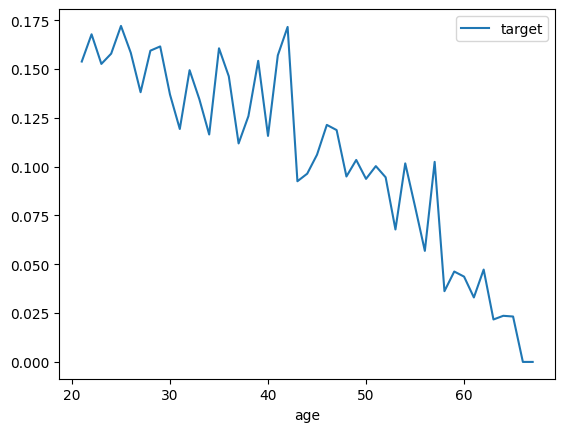

In [9]:
# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# для работы с категориальными данными можно воспользоваться pd.get_dummies
# сделайте предварительные выводы

dataset[['target', 'age']].groupby('age', as_index=False).target.mean().plot.line('age');

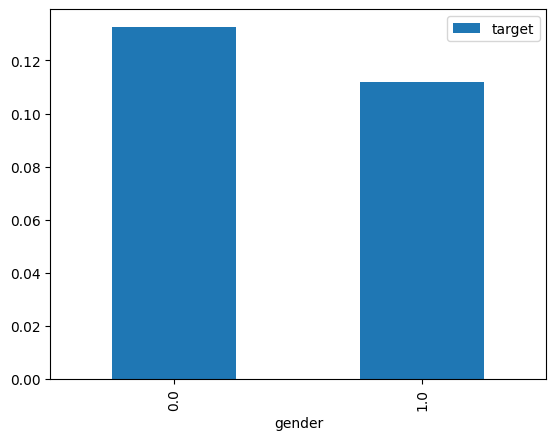

In [10]:
dataset[['target', 'gender']].groupby('gender', as_index=False).target.mean().plot.bar('gender');

In [11]:
dataset.child_total.value_counts()

child_total
1.0     5087
0.0     4984
2.0     4140
3.0      799
4.0      133
5.0       59
6.0       12
7.0        5
10.0       3
8.0        1
Name: count, dtype: int64

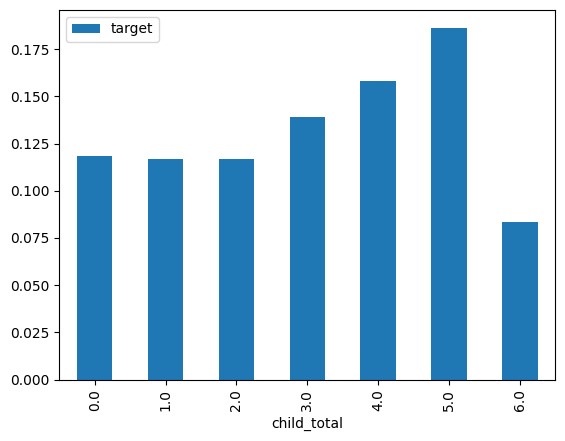

In [12]:
dataset.loc[dataset['child_total'].isin(dataset['child_total'].value_counts()[dataset['child_total'].value_counts() > 5].index), 
            ['target', 'child_total']].groupby('child_total', as_index=False).target.mean().plot.bar('child_total');

In [13]:
dataset['dependants'].value_counts()

dependants
0.0    8226
1.0    4535
2.0    2167
3.0     243
4.0      42
5.0       5
6.0       4
7.0       1
Name: count, dtype: int64

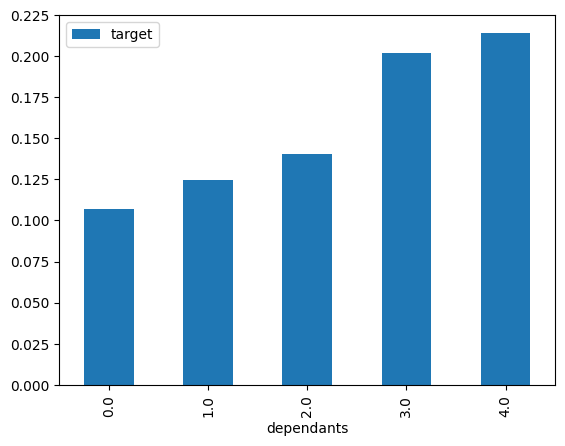

In [14]:
dataset.loc[dataset['dependants'].isin(dataset['dependants'].value_counts()[dataset['dependants'].value_counts() > 5].index), 
            ['target', 'dependants']].groupby('dependants', as_index=False).target.mean().plot.bar('dependants');

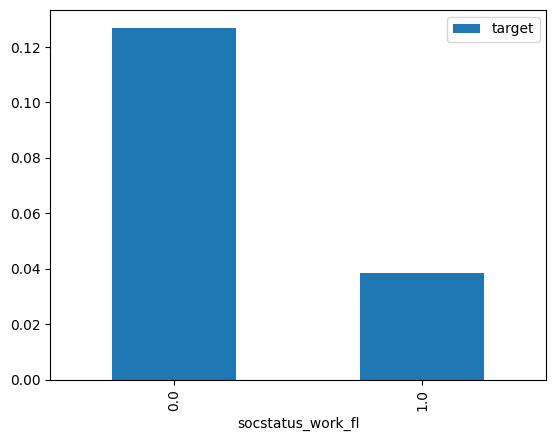

In [15]:
dataset[['target', 'socstatus_work_fl']].groupby('socstatus_work_fl', as_index=False).target.mean().plot.bar('socstatus_work_fl');

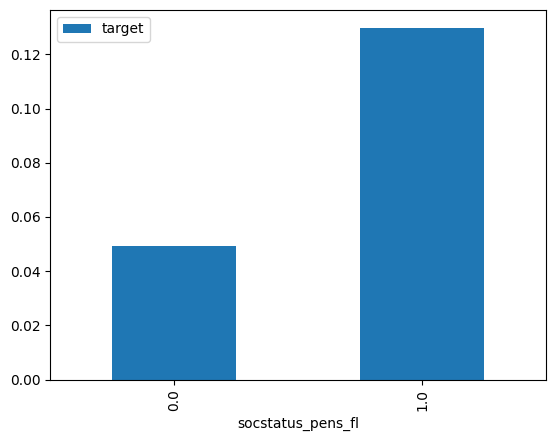

In [16]:
dataset[['target', 'socstatus_pens_fl']].groupby('socstatus_pens_fl', as_index=False).target.mean().plot.bar('socstatus_pens_fl');

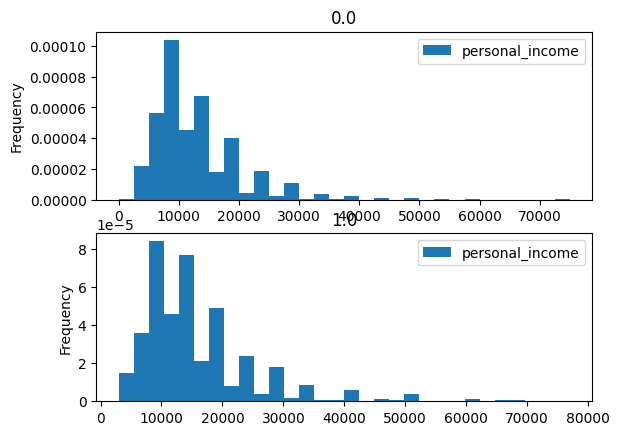

In [17]:
(dataset.loc[dataset['personal_income'] < dataset['personal_income'].quantile(0.999), ['target', 'personal_income']]
        .plot.hist('target', bins=30, density=True));

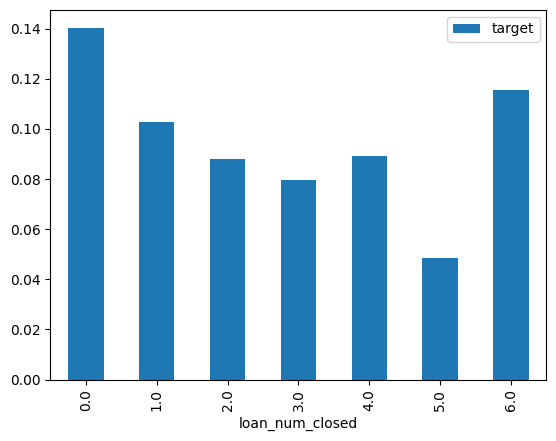

In [18]:
dataset.loc[dataset['loan_num_closed'].isin(dataset['loan_num_closed'].value_counts()[dataset['loan_num_closed'].value_counts() > 10].index), 
            ['target', 'loan_num_closed']].groupby('loan_num_closed', as_index=False).target.mean().plot.bar('loan_num_closed');

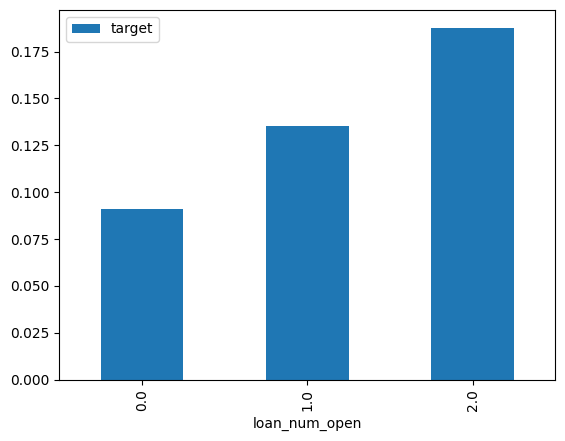

In [19]:
dataset['loan_num_open'] = dataset['loan_num_total'] - dataset['loan_num_closed']
dataset = dataset.drop('loan_num_total', axis=1)
dataset.loc[dataset['loan_num_open'].isin(dataset['loan_num_open'].value_counts()[dataset['loan_num_open'].value_counts() > 10].index), 
            ['target', 'loan_num_open']].groupby('loan_num_open', as_index=False).target.mean().plot.bar('loan_num_open');

In [20]:
dataset.corr()

,target,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,loan_num_closed,loan_num_open
target,1.000000,-0.103868,-0.030723,0.011598,0.052170,-0.078377,0.084826,0.094575,-0.062475,0.069724
age,-0.103868,1.000000,0.142442,0.210014,-0.284973,0.453267,-0.561319,-0.089942,-0.002413,0.040343
gender,-0.030723,0.142442,1.000000,0.049780,-0.081443,0.102309,-0.132074,-0.238123,0.012044,-0.008939
child_total,0.011598,0.210014,0.049780,1.000000,0.509516,0.041254,-0.058140,-0.053319,0.004967,0.046189
dependants,0.052170,-0.284973,-0.081443,0.509516,1.000000,-0.201052,0.249097,0.034964,0.041561,0.003720
socstatus_work_fl,-0.078377,0.453267,0.102309,0.041254,-0.201052,1.000000,-0.799768,-0.197759,-0.042552,0.024791
socstatus_pens_fl,0.084826,-0.561319,-0.132074,-0.058140,0.249097,-0.799768,1.000000,0.139629,0.021256,-0.026261
personal_income,0.094575,-0.089942,-0.238123,-0.053319,0.034964,-0.197759,0.139629,1.000000,-0.026013,-0.007315
loan_num_closed,-0.062475,-0.002413,0.012044,0.004967,0.041561,-0.042552,0.021256,-0.026013,1.000000,-0.602752
loan_num_open,0.069724,0.040343,-0.008939,0.046189,0.003720,0.024791,-0.026261,-0.007315,-0.602752,1.000000


По графикам можно сказать, что чем выше возраст, меньше детей, меньше иждевенцев, меньше открытых кредитов, тем в среднем меньше вероятность отклика. Также вероятность отклика больше у женщин, безработных и людей не на пенсии.

In [21]:
# раздедлите на обучающую и тестовую выборк
x_train, x_test, y_train, y_test = train_test_split(dataset.drop('target', axis=1), dataset['target'], test_size=0.25, random_state=142)

In [22]:
# обучите модель методом ближайших соседей

k = 2
best_score = 0
for i in range(4, 44, 2):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    score = f1_score(y_test, knn.predict(x_test)) 
    if score > best_score:
        k = i
        best_score = score

k, best_score

(4, 0.04175365344467641)

In [23]:
# проверьте качество модели с помощью F-мера
knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
f1_score(y_test, y_pred)

0.04175365344467641

In [24]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.23255813953488372, 0.022935779816513763)

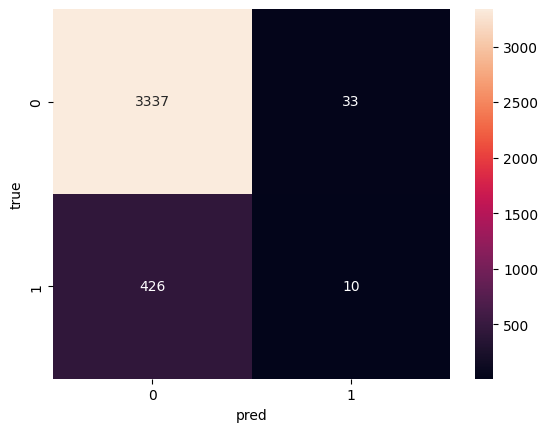

In [30]:
# проверьте качество модели с помощью матрицы сопряжённостей
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred, labels=[0, 1]), annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('true');

    # сделайте вывод о работе модели

    Модель имеет хорошую точность (accuracy), но очень плохо классифицирует положительный класс (из-за сильного дисбаланса) и часто определяет положительный класс как отрицательный (ошибка второго рода).
    